In [9]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Load the CSV file
file = "Happiness.csv"
df = pd.read_csv(file, sep=';', engine='python')

print("Data loaded successfully!")
print(f"Initial shape: {df.shape}\n")


Data loaded successfully!
Initial shape: (1704, 26)



In [ ]:
# Data Cleaning

# --- Replace commas with dots and strip spaces (modern replacement for applymap) ---
df = df.map(lambda x: str(x).replace(',', '.').strip() if isinstance(x, str) else x)

# --- Convert numeric columns safely (without deprecated errors='ignore') ---
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except Exception:
        # Skip non-numeric columns
        pass

# --- Fill missing numeric values by country mean, then global mean ---
for col in df.select_dtypes(include='number').columns:
    df[col] = df.groupby('Country name')[col].transform(lambda x: x.fillna(x.mean()))
    df[col] = df[col].fillna(df[col].mean())

# --- Fill missing categorical values with mode ---
for col in df.select_dtypes(include='object').columns:
    mode_val = df[col].mode().iloc[0] if not df[col].mode().empty else np.nan
    df[col] = df[col].fillna(mode_val)

print("Missing values handled.\n")



In [9]:
# Now print the entire DataFrame
df.head(10)

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,...,0.377303,0.385438,0.376170,0.281074,0.39048,0.283925,0.249574,0.26807,0.264336,0.237493
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,...,0.377303,0.385438,0.441906,0.286315,0.39048,0.283925,0.249574,0.26807,0.264336,0.237493
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,...,0.377303,0.385438,0.327318,0.275833,0.39048,0.283925,0.249574,0.26807,0.264336,0.237493
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,...,0.377303,0.385438,0.336764,0.281074,0.39048,0.283925,0.249574,0.26807,0.264336,0.237493
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,...,0.377303,0.385438,0.344540,0.281074,0.39048,0.283925,0.249574,0.26807,0.264336,0.237493
5,Afghanistan,2013,3.572100,7.522238,0.483552,52.560001,0.577955,0.070403,0.823204,0.620585,...,0.377303,0.385438,0.304368,0.281074,0.39048,0.283925,0.249574,0.26807,0.264336,0.237493
6,Afghanistan,2014,3.130896,7.516955,0.525568,52.880001,0.508514,0.113184,0.871242,0.531691,...,0.377303,0.385438,0.413974,0.281074,0.39048,0.283925,0.249574,0.26807,0.264336,0.237493
7,Afghanistan,2015,3.982855,7.500539,0.528597,53.200001,0.388928,0.089091,0.880638,0.553553,...,0.377303,0.385438,0.596918,0.281074,0.39048,0.283925,0.249574,0.26807,0.264336,0.237493
8,Afghanistan,2016,4.220169,7.497038,0.559072,53.000000,0.522566,0.051365,0.793246,0.564953,...,0.377303,0.385438,0.418629,0.281074,0.39048,0.283925,0.249574,0.26807,0.264336,0.237493
9,Afghanistan,2017,2.661718,7.497755,0.490880,52.799999,0.427011,-0.112198,0.954393,0.496349,...,0.377303,0.385438,0.286599,0.281074,0.39048,0.283925,0.249574,0.26807,0.264336,0.237493


In [112]:
# Descriptive Statistics
print("\nSummary Statistics:")
print(df.describe().T.head(10))


Summary Statistics:
                                   count         mean       std          min  \
Year                              1704.0  2012.332160  3.688072  2005.000000   
Life Ladder                       1704.0     5.437155  1.121149     2.661718   
Log GDP per capita                1704.0     9.224716  1.181449     6.457201   
Social support                    1704.0     0.810691  0.118975     0.290184   
Healthy life expectancy at birth  1704.0    63.135285  7.532699    32.299999   
Freedom to make life choices      1704.0     0.734634  0.144056     0.257534   
Generosity                        1704.0    -0.000097  0.161693    -0.336385   
Perceptions of corruption         1704.0     0.743827  0.188696     0.035198   
Positive affect                   1704.0     0.708963  0.107753     0.362498   
Negative affect                   1704.0     0.265832  0.084532     0.083426   

                                          25%          50%          75%  \
Year                   

In [11]:
# Average Happiness per Country
avg_happiness = df.groupby("Country name")["Life Ladder"].mean().sort_values(ascending=False)
top_10 = avg_happiness.head(10)
bottom_10 = avg_happiness.tail(10)

print("\nTop 10 Happiest Countries:")
print(top_10)

print("\nBottom 10 Least Happy Countries:")
print(bottom_10)





Top 10 Happiest Countries:
Country name
Denmark        7.692072
Finland        7.554010
Norway         7.549186
Switzerland    7.534953
Netherlands    7.466531
Canada         7.423908
Iceland        7.410776
Sweden         7.371575
New Zealand    7.323475
Australia      7.298081
Name: Life Ladder, dtype: float64

Bottom 10 Least Happy Countries:
Country name
Liberia                     3.913231
Yemen                       3.886234
Comoros                     3.811033
Afghanistan                 3.705495
Tanzania                    3.694879
Rwanda                      3.689593
Burundi                     3.548124
Central African Republic    3.514954
Togo                        3.477006
South Sudan                 3.401875
Name: Life Ladder, dtype: float64


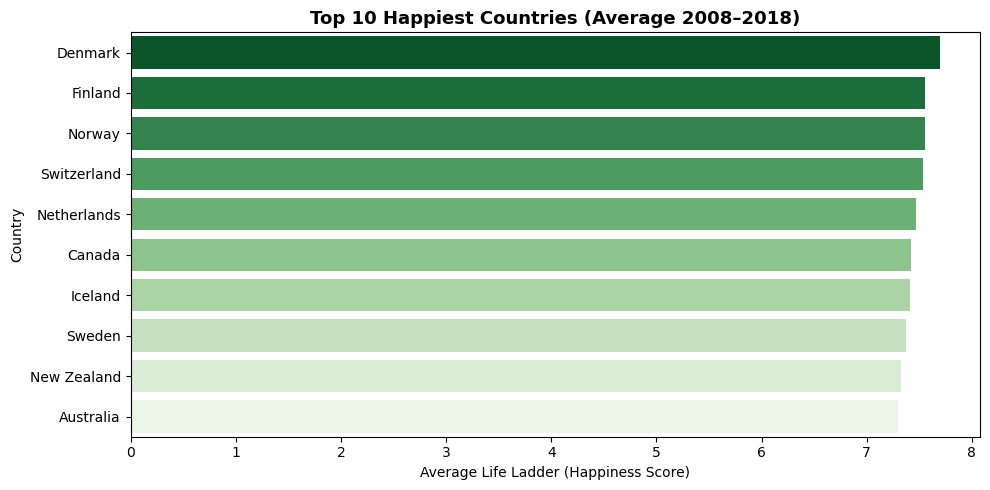

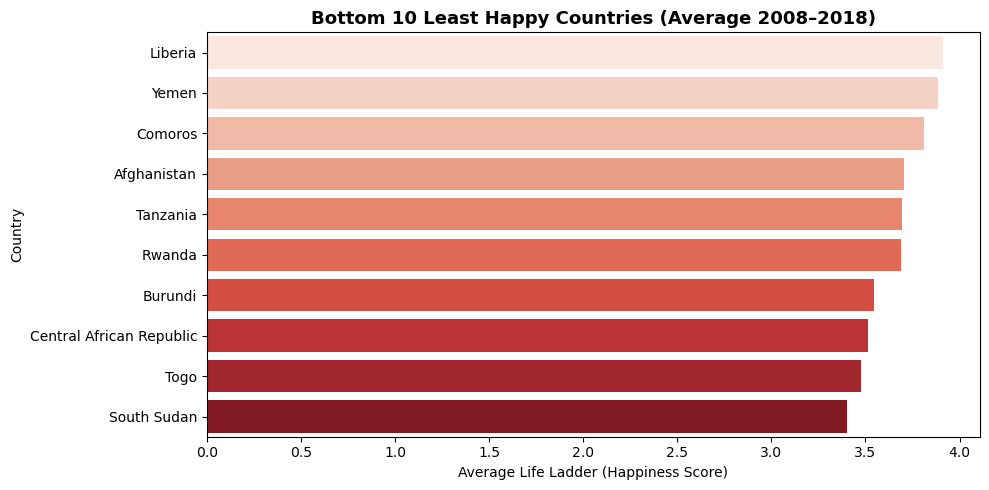

In [29]:
# Visualize Happiness Rankings

# --- Top 10 happiest countries ---
plt.figure(figsize=(10,5))
sns.barplot(
    x=top_10.values,
    y=top_10.index,
    hue=top_10.index,        # <- assign hue
    palette="Greens_r",
    legend=False             # <- disables redundant legend
)
plt.title("Top 10 Happiest Countries (Average 2008–2018)", fontsize=13, fontweight='bold')
plt.xlabel("Average Life Ladder (Happiness Score)")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig('top10.png')
plt.show()

# --- Bottom 10 least happy countries ---
plt.figure(figsize=(10,5))
sns.barplot(
    x=bottom_10.values,
    y=bottom_10.index,
    hue=bottom_10.index,     # <- assign hue
    palette="Reds",
    legend=False
)
plt.title("Bottom 10 Least Happy Countries (Average 2008–2018)", fontsize=13, fontweight='bold')
plt.xlabel("Average Life Ladder (Happiness Score)")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig('bottom10.png')
plt.show()





Correlation with Life Ladder:
Life Ladder                                                 1.000000
Log GDP per capita                                          0.779222
Healthy life expectancy at birth                            0.736665
Delivery Quality                                            0.710434
Social support                                              0.702781
Democratic Quality                                          0.620971
Positive affect                                             0.542249
Freedom to make life choices                                0.514972
Most people can be trusted, WVS round 2005-2009             0.279781
Most people can be trusted, WVS round 1994-1998             0.243647
Most people can be trusted, Gallup                          0.232868
Generosity                                                  0.198193
Most people can be trusted, WVS round 2010-2014             0.186647
Most people can be trusted, WVS round 1999-2004             0.127599
Mos

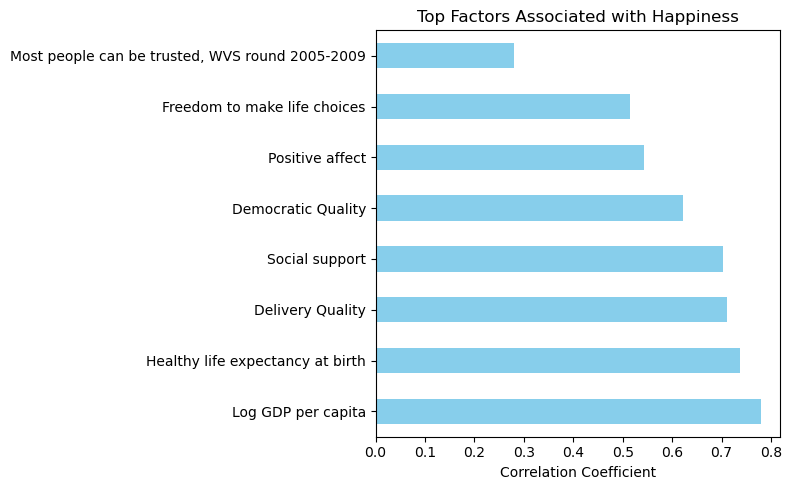

In [31]:
# Correlation with Happiness

corr = df.corr(numeric_only=True)["Life Ladder"].sort_values(ascending=False)
print("\nCorrelation with Life Ladder:")
print(corr)

plt.figure(figsize=(8,5))
corr.drop("Life Ladder").head(8).plot(kind='barh', color='skyblue')
plt.title("Top Factors Associated with Happiness")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.savefig('happiness_correlation.png')
plt.show()



In [37]:
# Focus on GINI-related columns

gini_cols = [
    "GINI index (World Bank estimate)",
    "GINI index (World Bank estimate), average 2000-16",
    "gini of household income reported in Gallup, by wp5-year"
]

print("Missing values in GINI columns:")
print(df[gini_cols].isnull().sum(), "\n")


Missing values in GINI columns:
GINI index (World Bank estimate)                            0
GINI index (World Bank estimate), average 2000-16           0
gini of household income reported in Gallup, by wp5-year    0
dtype: int64 



In [39]:
def detect_comma_usage(df):
    """
    Detects whether commas in each column are used as decimal separators
    (like 6,43) or as thousands separators (like 1,234,567).
    Returns a summary DataFrame.
    """

    summary = []

    for col in df.columns:
        # Convert to string, ignore missing
        series_str = df[col].dropna().astype(str)

        # Only look at entries that actually contain commas
        has_commas = series_str[series_str.str.contains(',', regex=False)]
        if has_commas.empty:
            continue

        # Detect patterns
        decimal_like = has_commas.str.contains(r'\d+,\d{1,2}$', regex=True).mean()  # e.g. 6,43
        thousand_like = has_commas.str.contains(r'\d{1,3}(,\d{3})+', regex=True).mean()  # e.g. 1,234,567
        text_like = has_commas.str.contains(r'[A-Za-z]', regex=True).mean()  # text entries

        summary.append({
            'Column': col,
            '%_with_commas': round(100 * len(has_commas) / len(series_str), 1),
            '%_decimal_pattern': round(100 * decimal_like, 1),
            '%_thousand_pattern': round(100 * thousand_like, 1),
            '%_text_pattern': round(100 * text_like, 1)
        })

    return pd.DataFrame(summary)

# --- Run it on your DataFrame ---
comma_report = detect_comma_usage(df)
print(comma_report)


Empty DataFrame
Columns: []
Index: []


Correlation of GINI columns with Life Ladder:
Life Ladder                                                 1.000000
GINI index (World Bank estimate)                           -0.135993
GINI index (World Bank estimate), average 2000-16          -0.184130
gini of household income reported in Gallup, by wp5-year   -0.309442
Name: Life Ladder, dtype: float64 



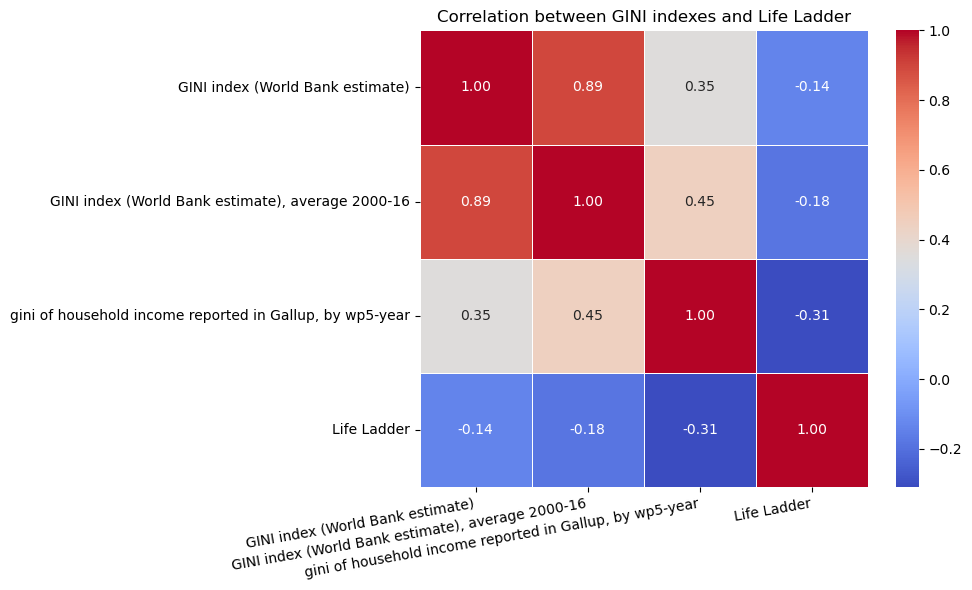

In [41]:
# Correlation with Life Ladder
numeric_cols = gini_cols + ['Life Ladder']
df_corr = df[numeric_cols].dropna()
corr_matrix = df_corr.corr()

print("Correlation of GINI columns with Life Ladder:")
print(corr_matrix['Life Ladder'].sort_values(ascending=False), "\n")

# Heatmap for correlation with improved readability
plt.figure(figsize=(10,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 10}  # font size for annotations
)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=10, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.title("Correlation between GINI indexes and Life Ladder", fontsize=12)
plt.tight_layout()
plt.savefig('gini_correlation.png')
plt.show()


In [43]:
# Extract GINI for the last year

last_year = df['Year'].max()
df_last_year = df[df['Year'] == last_year].copy()

# Use Gallup GINI as primary, fallback to World Bank GINI
df_last_year['GINI_final'] = df_last_year['gini of household income reported in Gallup, by wp5-year'].fillna(
    df_last_year['GINI index (World Bank estimate)']
)

# Sort descending by inequality
gini_last_year = df_last_year[['Country name', 'GINI_final']].sort_values(by='GINI_final', ascending=False)

# Print all countries with GINI for last year
pd.set_option('display.max_rows', None)  # Show all rows in console
print(f"✅ GINI index for all countries in {last_year}:")
print(gini_last_year)


✅ GINI index for all countries in 2018:
                  Country name  GINI_final
362                 Costa Rica    0.786517
1040                Mozambique    0.784367
1051                   Namibia    0.771211
1431                 Swaziland    0.732568
1590      United Arab Emirates    0.721079
927                     Malawi    0.702330
1616             United States    0.701418
1328              Sierra Leone    0.690721
1381              South Africa    0.685775
231                    Burundi    0.680813
614                   Honduras    0.672159
601                      Haiti    0.669434
28                     Algeria    0.667872
867                    Liberia    0.661966
1566                    Uganda    0.655503
1280                    Rwanda    0.647506
581                  Guatemala    0.634369
1690                    Zambia    0.619443
191                   Botswana    0.616160
288                       Chad    0.607655
153                      Benin    0.606243
226           

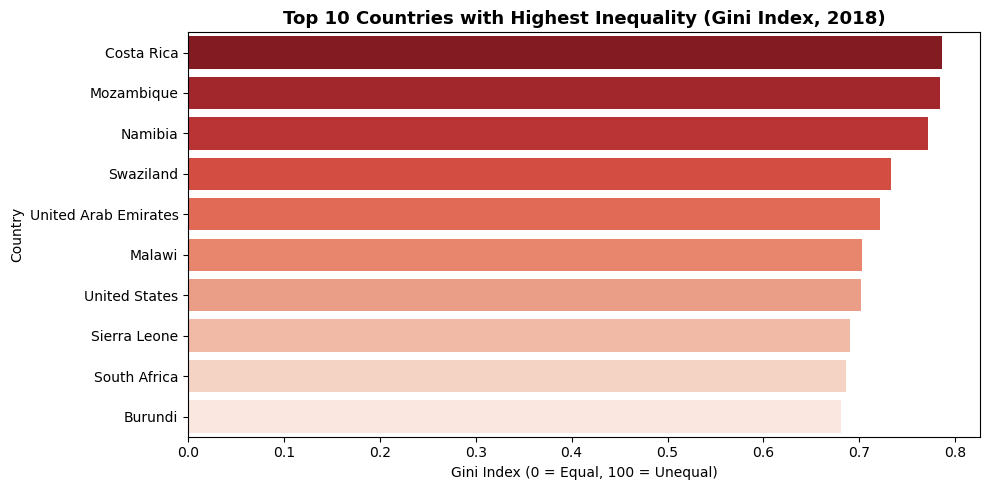

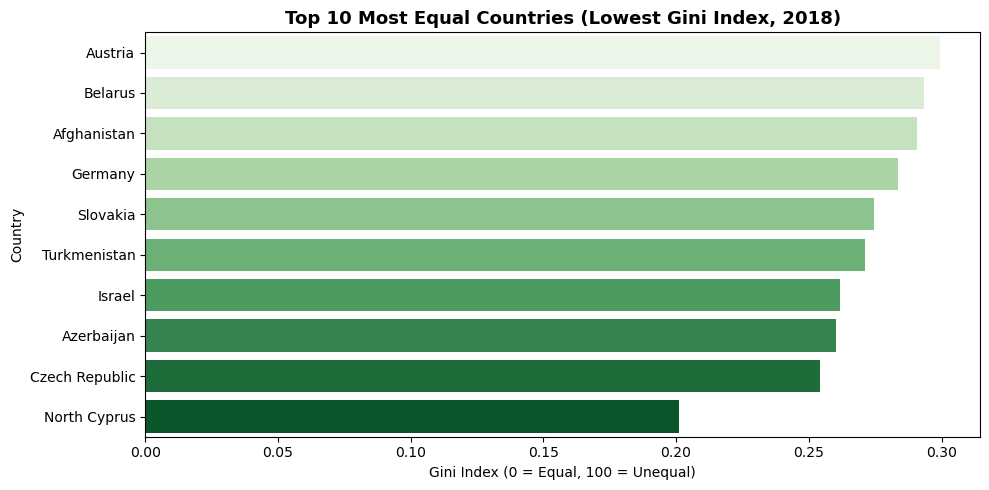

In [45]:
# --- Clean numeric GINI values (if needed) ---
df_last_year['GINI_final'] = (
    df_last_year['GINI_final']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .str.strip()
)
df_last_year['GINI_final'] = pd.to_numeric(df_last_year['GINI_final'], errors='coerce')

# --- Prepare data ---
gini_sorted = df_last_year[['Country name', 'GINI_final']].dropna().sort_values(by='GINI_final', ascending=False)
top10 = gini_sorted.head(10)
bottom10 = gini_sorted.tail(10)

# --- Plot top 10 (most unequal) ---
plt.figure(figsize=(10,5))
sns.barplot(
    x='GINI_final', y='Country name', hue='Country name',
    data=top10, palette='Reds_r', legend=False
)
plt.title(f"Top 10 Countries with Highest Inequality (Gini Index, {last_year})", fontsize=13, fontweight='bold')
plt.xlabel('Gini Index (0 = Equal, 100 = Unequal)')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top10_inequality_gini.png')
plt.show()

# --- Plot bottom 10 (most equal) ---
plt.figure(figsize=(10,5))
sns.barplot(
    x='GINI_final', y='Country name', hue='Country name',
    data=bottom10, palette='Greens', legend=False
)
plt.title(f"Top 10 Most Equal Countries (Lowest Gini Index, {last_year})", fontsize=13, fontweight='bold')
plt.xlabel('Gini Index (0 = Equal, 100 = Unequal)')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top10_equality_gini.png')
plt.show()


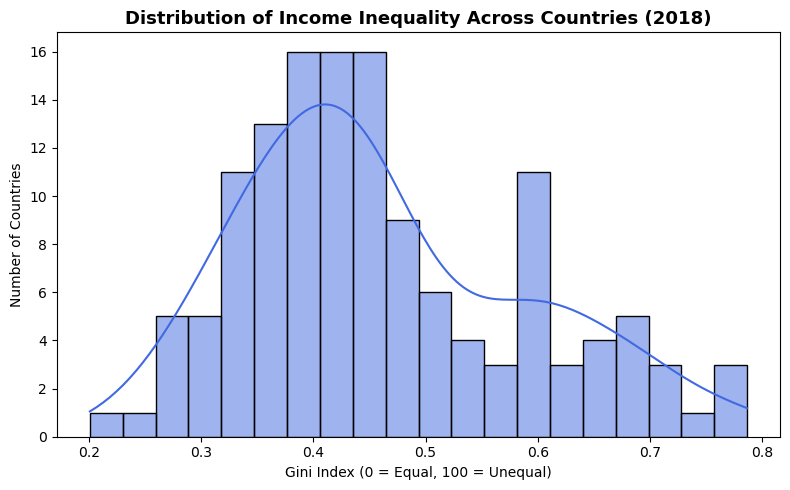

In [47]:
# Histogram of Inequality Distribution

plt.figure(figsize=(8,5))
sns.histplot(gini_sorted['GINI_final'], bins=20, kde=True, color='royalblue')
plt.title(f"Distribution of Income Inequality Across Countries ({last_year})", fontsize=13, fontweight='bold')
plt.xlabel('Gini Index (0 = Equal, 100 = Unequal)')
plt.ylabel('Number of Countries')
plt.tight_layout()
plt.savefig('income_inequality_accross_countries.png')
plt.show()

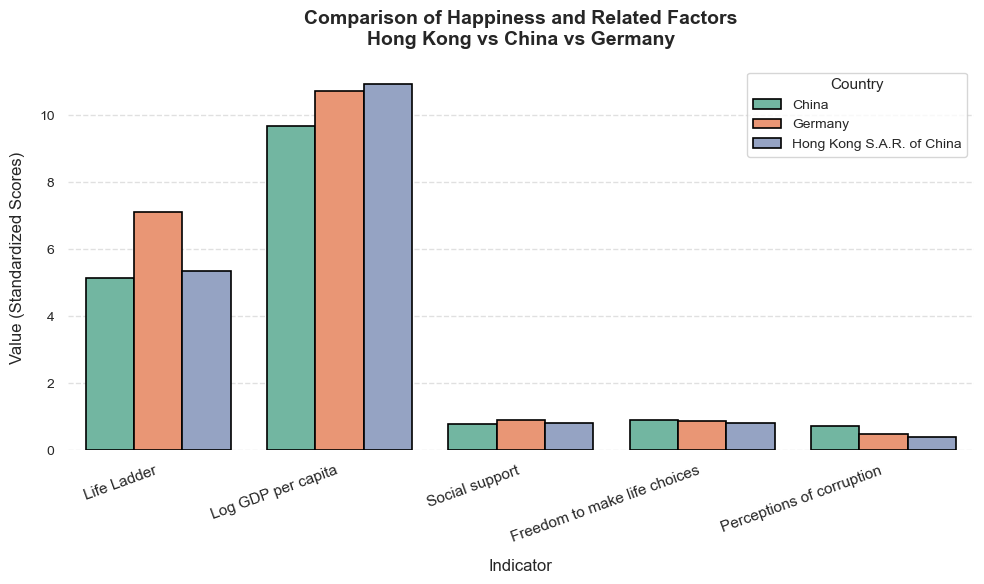

In [49]:
# Comparison of Hong Kong,China and Germany

# --- Select Paul's countries of interest ---
countries = ['Hong Kong S.A.R. of China', 'China', 'Germany']

# --- Filter dataset for these countries ---
df_compare = df[df['Country name'].isin(countries)]

# --- Take the latest available year for each country ---
latest_years = df_compare.groupby('Country name')['Year'].max().reset_index()
df_compare_latest = pd.merge(
    df_compare,
    latest_years,
    on=['Country name', 'Year'],
    how='inner'
)

# --- Choose indicators to visualize ---
cols_to_plot = [
    'Country name',
    'Life Ladder',
    'Log GDP per capita',
    'Social support',
    'Freedom to make life choices',
    'Perceptions of corruption'
]

# --- Reshape to long format ---
df_melt = df_compare_latest[cols_to_plot].melt(
    id_vars='Country name',
    var_name='Indicator',
    value_name='Value'
)

# --- Clean any 'nan' text and ensure numeric values ---
df_melt['Value'] = (
    df_melt['Value']
    .astype(str)
    .str.strip()
    .replace(['nan', 'NaN', 'NAN'], pd.NA)
)
df_melt['Value'] = pd.to_numeric(df_melt['Value'], errors='coerce')
df_melt = df_melt.dropna(subset=['Value'])

# --- Create the chart ---
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(
    x='Indicator',
    y='Value',
    hue='Country name',
    data=df_melt,
    palette='Set2',
    edgecolor='black',
    linewidth=1.2
)

# --- Beautify the chart ---
plt.title('Comparison of Happiness and Related Factors\nHong Kong vs China vs Germany',
          fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Indicator', fontsize=12, labelpad=10)
plt.ylabel('Value (Standardized Scores)', fontsize=12, labelpad=10)
plt.xticks(rotation=20, ha='right', fontsize=11)
plt.yticks(fontsize=10)
plt.legend(title='Country', fontsize=10, title_fontsize=11, loc='upper right', frameon=True)
sns.despine(left=True, bottom=True)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('country_comparison_hk_china_germany.png')
plt.show()


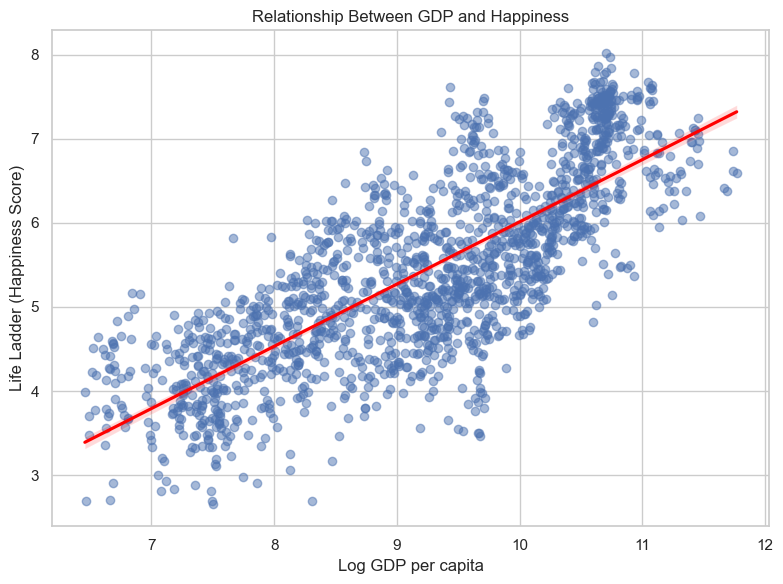

Correlation between GDP and Happiness: 0.78


In [51]:
# Aspect 1 — Relationship Between GDP and Happiness

# How strongly does a country’s Log GDP per capita correlate with its Life Ladder (happiness)?

plt.figure(figsize=(8,6))
sns.regplot(
    data=df,
    x='Log GDP per capita',
    y='Life Ladder',
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red'}
)
plt.title('Relationship Between GDP and Happiness')
plt.xlabel('Log GDP per capita')
plt.ylabel('Life Ladder (Happiness Score)')
plt.tight_layout()
plt.savefig('gdp_vs_happiness.png')
plt.show()

corr_gdp = df[['Life Ladder', 'Log GDP per capita']].corr().iloc[0,1]
print(f"Correlation between GDP and Happiness: {corr_gdp:.2f}")


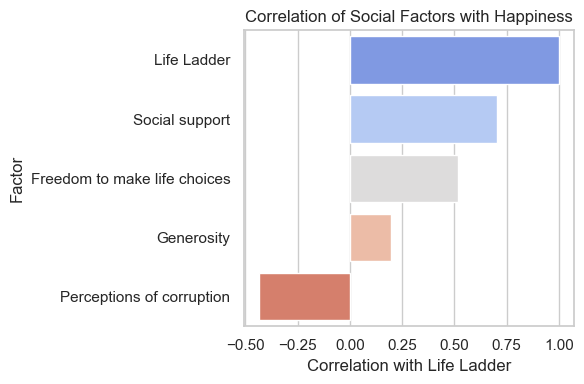

In [53]:
# Aspect 2 — Social Support and Freedom as Predictors of Happiness

# Which social factors (e.g., Social support, Freedom to make life choices) explain more of the variation in happiness?

social_corr = df[['Life Ladder', 'Social support', 'Freedom to make life choices',
                  'Perceptions of corruption', 'Generosity']].corr()['Life Ladder'].sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(
    x=social_corr.values,
    y=social_corr.index,
    hue=social_corr.index,   # assign hue
    palette='coolwarm',      # color palette
    legend=False             # turn off redundant legend
)
plt.title('Correlation of Social Factors with Happiness')
plt.xlabel('Correlation with Life Ladder')
plt.ylabel('Factor')
plt.tight_layout()
plt.savefig("socialsupport_vs_happiness.png")
plt.show()


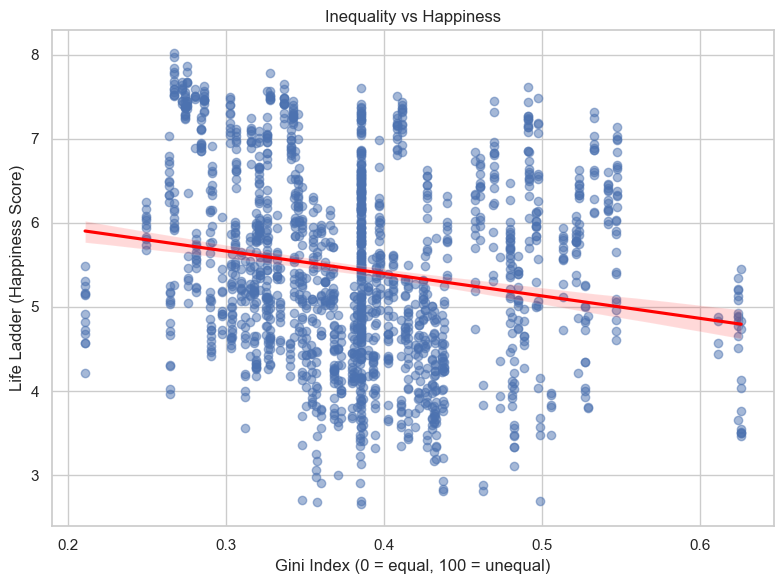

Correlation between Inequality and Happiness: -0.18


In [55]:
# Aspect 3 — How Inequality (Gini Index) Relates to Happiness

# Do countries with higher inequality (Gini index) tend to be less happy?

plt.figure(figsize=(8,6))
sns.regplot(
    data=df,
    x='GINI index (World Bank estimate), average 2000-16',
    y='Life Ladder',
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red'}
)
plt.title('Inequality vs Happiness')
plt.xlabel('Gini Index (0 = equal, 100 = unequal)')
plt.ylabel('Life Ladder (Happiness Score)')
plt.tight_layout()
plt.savefig("gini_vs_happiness.png")
plt.show()

corr_gini = df[['Life Ladder', 'GINI index (World Bank estimate), average 2000-16']].corr().iloc[0,1]
print(f"Correlation between Inequality and Happiness: {corr_gini:.2f}")
